<a href="https://colab.research.google.com/github/inachenyx/painClassify/blob/main/painClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 %pip install scikit-plot
 %pip install scipy==1.11.4
 %pip install statannotations

  Using cached statannotations-0.7.2-py3-none-any.whl.metadata (7.7 kB)
Using cached statannotations-0.7.2-py3-none-any.whl (39 kB)


### import packages

In [2]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.datasets import make_blobs
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut, GroupKFold, learning_curve
from sklearn.metrics import accuracy_score
#绘制有显著性检验结果的小提琴图
import seaborn as sns
from statannotations.Annotator import Annotator

In [4]:
# meta-estimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Upload data file from local

In [5]:
from google.colab import files
uploaded = files.upload()

Saving allfeature.mat to allfeature.mat


In [6]:
# Optional: check uploaded files
import os
os.listdir()

['.config', 'allfeature.mat', 'sample_data']

### Load matlab input data, shape: (20 subjects × 48 samples each = 960 total, 78 features)

In [7]:
data1= loadmat('allfeature.mat')
data1 # type(data1) = dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Mar 30 10:22:32 2023',
 '__version__': '1.0',
 '__globals__': [],
 'allfeature': array([[ 166.81395914,  -79.06271678,    5.39222803, ...,    1.15384664,
            1.19508644,    0.78083541],
        [ 101.32687949,  -94.98415466,   -1.83584695, ...,    1.14931862,
            1.23364202,    0.88269087],
        [ 128.91419997, -159.19282596,    2.09217151, ...,    1.30164211,
            1.2970149 ,    0.81681964],
        ...,
        [  21.25685769,  -20.27615109,   -1.15525676, ...,    0.7101134 ,
            0.47663037,    0.35536794],
        [  18.63807482,  -18.97140068,    0.88943484, ...,    0.58694835,
            0.51154476,    0.3140685 ],
        [  17.79520915,  -23.31899865,   -0.47494661, ...,    0.76536606,
            0.51354686,    0.32751652]])}

In [8]:
finaldata=np.array(data1['allfeature'])
finaldata.shape

(960, 78)

### Fill in a dictionary called "featuremap" with names of 39* 2chs = 78 features, and make a list for future use

In [9]:
feature=['max','min','mean','med','peak','arv','var','std','kurtosis','skewness','rms',
         'rs','rmsa','waveformF','peakF','impulseF','clearanceF','FC','MSF','RMSF','VF',
         'RVF','SKMean','SKStd','SKSkewness','SKKurtosis','psdE','svdpE','eE','ApEn',
         'SpEn','FuzzyEn','PeEn','enveEn','detaDE','thetaDE','alphaDE','betaDE','gammaDE']
featuremap= {} # dict{index:'str'}
for i in range(0, 78):
    if i<=38:
        featuremap[i]=feature[i]+'_ch1'
    else:
        featuremap[i] = feature[i-39] + '_ch2'
print(featuremap)

{0: 'max_ch1', 1: 'min_ch1', 2: 'mean_ch1', 3: 'med_ch1', 4: 'peak_ch1', 5: 'arv_ch1', 6: 'var_ch1', 7: 'std_ch1', 8: 'kurtosis_ch1', 9: 'skewness_ch1', 10: 'rms_ch1', 11: 'rs_ch1', 12: 'rmsa_ch1', 13: 'waveformF_ch1', 14: 'peakF_ch1', 15: 'impulseF_ch1', 16: 'clearanceF_ch1', 17: 'FC_ch1', 18: 'MSF_ch1', 19: 'RMSF_ch1', 20: 'VF_ch1', 21: 'RVF_ch1', 22: 'SKMean_ch1', 23: 'SKStd_ch1', 24: 'SKSkewness_ch1', 25: 'SKKurtosis_ch1', 26: 'psdE_ch1', 27: 'svdpE_ch1', 28: 'eE_ch1', 29: 'ApEn_ch1', 30: 'SpEn_ch1', 31: 'FuzzyEn_ch1', 32: 'PeEn_ch1', 33: 'enveEn_ch1', 34: 'detaDE_ch1', 35: 'thetaDE_ch1', 36: 'alphaDE_ch1', 37: 'betaDE_ch1', 38: 'gammaDE_ch1', 39: 'max_ch2', 40: 'min_ch2', 41: 'mean_ch2', 42: 'med_ch2', 43: 'peak_ch2', 44: 'arv_ch2', 45: 'var_ch2', 46: 'std_ch2', 47: 'kurtosis_ch2', 48: 'skewness_ch2', 49: 'rms_ch2', 50: 'rs_ch2', 51: 'rmsa_ch2', 52: 'waveformF_ch2', 53: 'peakF_ch2', 54: 'impulseF_ch2', 55: 'clearanceF_ch2', 56: 'FC_ch2', 57: 'MSF_ch2', 58: 'RMSF_ch2', 59: 'VF_ch2'

In [10]:
featurename = list(featuremap.values())
# featurename=list(df_allfeature) # this gives you a list of df column names
print(featurename)

['max_ch1', 'min_ch1', 'mean_ch1', 'med_ch1', 'peak_ch1', 'arv_ch1', 'var_ch1', 'std_ch1', 'kurtosis_ch1', 'skewness_ch1', 'rms_ch1', 'rs_ch1', 'rmsa_ch1', 'waveformF_ch1', 'peakF_ch1', 'impulseF_ch1', 'clearanceF_ch1', 'FC_ch1', 'MSF_ch1', 'RMSF_ch1', 'VF_ch1', 'RVF_ch1', 'SKMean_ch1', 'SKStd_ch1', 'SKSkewness_ch1', 'SKKurtosis_ch1', 'psdE_ch1', 'svdpE_ch1', 'eE_ch1', 'ApEn_ch1', 'SpEn_ch1', 'FuzzyEn_ch1', 'PeEn_ch1', 'enveEn_ch1', 'detaDE_ch1', 'thetaDE_ch1', 'alphaDE_ch1', 'betaDE_ch1', 'gammaDE_ch1', 'max_ch2', 'min_ch2', 'mean_ch2', 'med_ch2', 'peak_ch2', 'arv_ch2', 'var_ch2', 'std_ch2', 'kurtosis_ch2', 'skewness_ch2', 'rms_ch2', 'rs_ch2', 'rmsa_ch2', 'waveformF_ch2', 'peakF_ch2', 'impulseF_ch2', 'clearanceF_ch2', 'FC_ch2', 'MSF_ch2', 'RMSF_ch2', 'VF_ch2', 'RVF_ch2', 'SKMean_ch2', 'SKStd_ch2', 'SKSkewness_ch2', 'SKKurtosis_ch2', 'psdE_ch2', 'svdpE_ch2', 'eE_ch2', 'ApEn_ch2', 'SpEn_ch2', 'FuzzyEn_ch2', 'PeEn_ch2', 'enveEn_ch2', 'detaDE_ch2', 'thetaDE_ch2', 'alphaDE_ch2', 'betaDE_ch

### Fill in a 960 x 78 dataframe of all features, with feature names as column names

In [11]:
df_allfeature=pd.DataFrame({})
for i in range(0,78):
    df_allfeature[featuremap[i]] = pd.Series(finaldata[:, i])
    # df[col_names] = pd.Series(the ith column containing 960 samples)
df_allfeature

,max_ch1,min_ch1,mean_ch1,med_ch1,peak_ch1,arv_ch1,var_ch1,std_ch1,kurtosis_ch1,skewness_ch1,...,ApEn_ch2,SpEn_ch2,FuzzyEn_ch2,PeEn_ch2,enveEn_ch2,detaDE_ch2,thetaDE_ch2,alphaDE_ch2,betaDE_ch2,gammaDE_ch2
0,166.813959,-79.062717,5.392228,-2.790309,245.876676,31.815987,1999.976058,44.721092,4.844295,1.179407,...,0.350624,0.301076,0.598355,0.522379,4.623539,2.021805,1.412648,1.153847,1.195086,0.780835
1,101.326879,-94.984155,-1.835847,-3.340101,196.311034,26.283139,1129.996915,33.615427,3.598552,0.265602,...,0.481794,0.415872,0.713874,0.530019,5.750126,1.859100,1.367031,1.149319,1.233642,0.882691
2,128.914200,-159.192826,2.092172,3.487677,288.107026,37.435054,2757.651426,52.513345,4.082916,-0.443398,...,0.362679,0.308449,0.630355,0.491129,6.229014,2.147117,1.549756,1.301642,1.297015,0.816820
3,78.484714,-84.640134,0.558508,1.751326,163.124848,18.385297,650.759739,25.509993,4.368423,-0.563057,...,0.534825,0.492856,0.758778,0.540971,6.739344,1.905882,1.350514,1.263958,1.261828,0.939012
4,36.634978,-38.879940,-1.243194,-0.542321,75.514918,13.298590,251.816790,15.868736,2.157331,-0.070203,...,0.733398,0.731609,0.925257,0.516819,6.777355,1.616098,1.309684,1.188875,1.307632,0.852297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,145.554952,-101.799048,-1.658257,0.320772,247.354000,18.669120,1239.296886,35.203649,9.103476,0.654275,...,0.583391,0.536555,0.456086,0.579752,6.188255,1.283101,0.795118,0.707301,0.498281,0.312393
956,29.599243,-27.424078,0.823647,0.785650,57.023321,8.065363,113.058761,10.632909,3.148662,-0.232453,...,0.676366,0.639097,0.547314,0.555430,5.840478,1.196891,0.743416,0.767468,0.616204,0.376129
957,21.256858,-20.276151,-1.155257,-0.334651,41.533009,6.706247,67.108205,8.191960,2.533418,0.062741,...,0.466711,0.414441,0.395870,0.558672,5.940841,1.087394,0.788022,0.710113,0.476630,0.355368
958,18.638075,-18.971401,0.889435,1.318910,37.609475,6.502409,64.967912,8.060267,2.696328,-0.400734,...,0.598940,0.561447,0.471818,0.572417,5.723889,1.238492,0.768567,0.586948,0.511545,0.314068


### Make a list of labels, and append to the end of df_allfeatures

In [12]:
labels = []
for subj in range(20): # 20 subjects in total, each has 48 segments
    if subj < 7:
        labels += ["mild"] * 48
    elif subj < 14:
        labels += ["moderate"] * 48
    else:
        labels += ["severe"] * 48
# same as: labels = ["mild"]*336 + ["moderate"]*336 + ["severe"]*288

In [13]:
df_allfeature['class'] = pd.Series(labels)

df_allfeature

,max_ch1,min_ch1,mean_ch1,med_ch1,peak_ch1,arv_ch1,var_ch1,std_ch1,kurtosis_ch1,skewness_ch1,...,SpEn_ch2,FuzzyEn_ch2,PeEn_ch2,enveEn_ch2,detaDE_ch2,thetaDE_ch2,alphaDE_ch2,betaDE_ch2,gammaDE_ch2,class
0,166.813959,-79.062717,5.392228,-2.790309,245.876676,31.815987,1999.976058,44.721092,4.844295,1.179407,...,0.301076,0.598355,0.522379,4.623539,2.021805,1.412648,1.153847,1.195086,0.780835,mild
1,101.326879,-94.984155,-1.835847,-3.340101,196.311034,26.283139,1129.996915,33.615427,3.598552,0.265602,...,0.415872,0.713874,0.530019,5.750126,1.859100,1.367031,1.149319,1.233642,0.882691,mild
2,128.914200,-159.192826,2.092172,3.487677,288.107026,37.435054,2757.651426,52.513345,4.082916,-0.443398,...,0.308449,0.630355,0.491129,6.229014,2.147117,1.549756,1.301642,1.297015,0.816820,mild
3,78.484714,-84.640134,0.558508,1.751326,163.124848,18.385297,650.759739,25.509993,4.368423,-0.563057,...,0.492856,0.758778,0.540971,6.739344,1.905882,1.350514,1.263958,1.261828,0.939012,mild
4,36.634978,-38.879940,-1.243194,-0.542321,75.514918,13.298590,251.816790,15.868736,2.157331,-0.070203,...,0.731609,0.925257,0.516819,6.777355,1.616098,1.309684,1.188875,1.307632,0.852297,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,145.554952,-101.799048,-1.658257,0.320772,247.354000,18.669120,1239.296886,35.203649,9.103476,0.654275,...,0.536555,0.456086,0.579752,6.188255,1.283101,0.795118,0.707301,0.498281,0.312393,severe
956,29.599243,-27.424078,0.823647,0.785650,57.023321,8.065363,113.058761,10.632909,3.148662,-0.232453,...,0.639097,0.547314,0.555430,5.840478,1.196891,0.743416,0.767468,0.616204,0.376129,severe
957,21.256858,-20.276151,-1.155257,-0.334651,41.533009,6.706247,67.108205,8.191960,2.533418,0.062741,...,0.414441,0.395870,0.558672,5.940841,1.087394,0.788022,0.710113,0.476630,0.355368,severe
958,18.638075,-18.971401,0.889435,1.318910,37.609475,6.502409,64.967912,8.060267,2.696328,-0.400734,...,0.561447,0.471818,0.572417,5.723889,1.238492,0.768567,0.586948,0.511545,0.314068,severe


### From the complete feature dataframe, create input X and ground truth y (convert to 0,1,2)

In [14]:
X, y_str = df_allfeature.iloc[:,:-1], df_allfeature.iloc[:, -1]

le= LabelEncoder()
# fit label encoder and return encoded labels (mild-0, moderate-1, severe-2)
y = le.fit_transform(y_str)

<Axes: title={'center': 'Digits Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

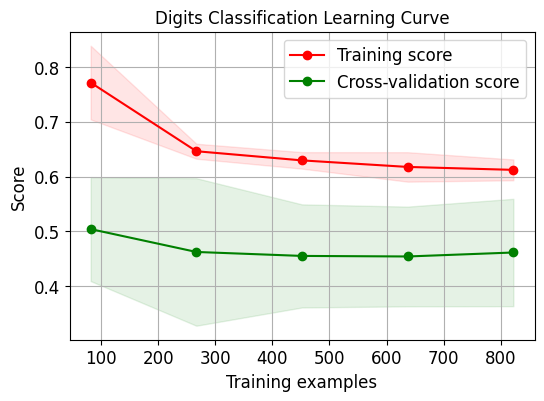

In [15]:
"绘制学习曲线"
skplt.estimators.plot_learning_curve(LogisticRegression(), X, y,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")
# The model is underfitting → Logistic Regression is too simple for your features.

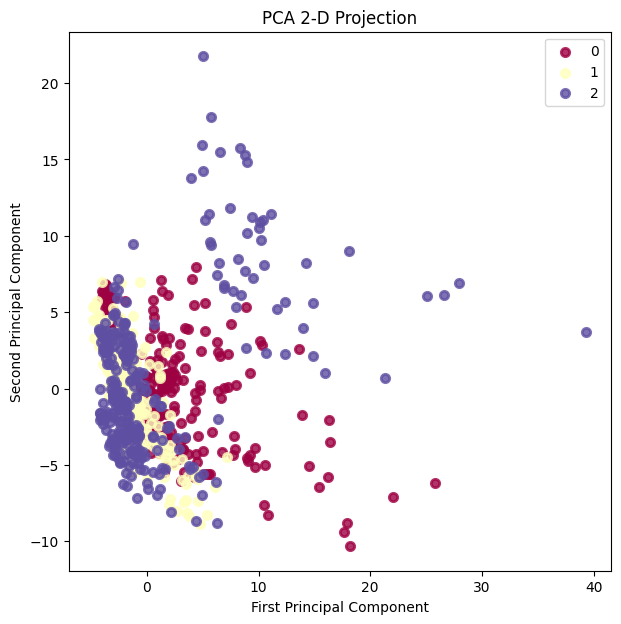

In [21]:
"""PCA visualization with scaled features"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # type(pca) = fitted PCA object, type(X_pca)=np.ndarray
skplt.decomposition.plot_pca_2d_projection(pca, X_scaled, y, figsize=(7,7))
plt.show()

In [22]:
type(X_pca)

numpy.ndarray

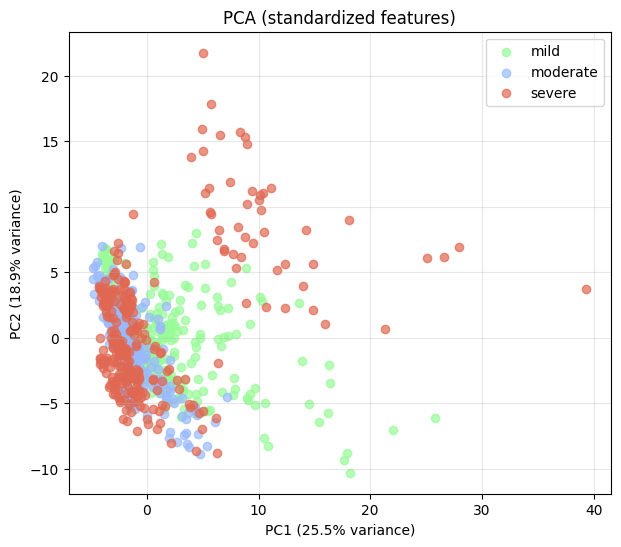

In [23]:
# Or, with variance explained shown
explained_var = pca.explained_variance_ratio_ * 100  # in %

plt.figure(figsize=(7,6))
colors = ['#98FB98', '#99BAFE', '#E16852']  # blue, orange, red
for class_idx, class_name in enumerate(le.classes_):
    plt.scatter(X_pca[y==class_idx, 0], # PC1 coordinates
                X_pca[y==class_idx, 1], # PC2 coordinates
                label=class_name,
                alpha=0.7, # 70% opacity, so overlapping points are visible
                c=colors[class_idx])

plt.xlabel(f"PC1 ({explained_var[0]:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]:.1f}% variance)")
plt.title("PCA (standardized features)")
plt.legend()
plt.grid(alpha=0.3)

In [24]:
# """pca降维"""
# pca=PCA()
# pca.fit( X )
# skplt.decomposition.plot_pca_2d_projection(pca,X,y,figsize=(8,8),cmap='set2')
# # If classes overlap heavily, separation may rely on subtler variance, only visible in higher PCs or nonlinear combinations.
# # Common in EEG because class differences are often subtle and nonlinear. Need more powerful, nonlinear models

<Axes: title={'center': 'Feature Importance'}>

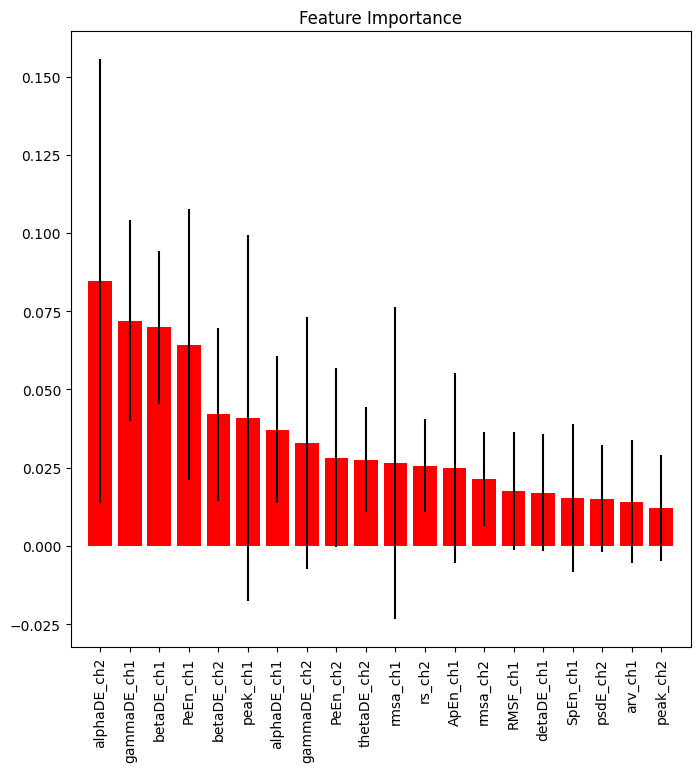

In [16]:
"""特征重要性排序"""
RF = RandomForestClassifier(n_estimators=5, random_state=0, n_jobs=-1)
RF.fit(X,y)
skplt.estimators.plot_feature_importances(RF, feature_names=featurename, x_tick_rotation=90, figsize=(8, 8)) # max_num_features defaults to 20

In [17]:
"""选择特征"""
# Sort the feature dataframe by importance
df_sortedfeature = pd.DataFrame({'columns': featurename, 'importance': RF.feature_importances_}).sort_values(by="importance", ascending=False)
df_sortedfeature # shape (78, 2)

,columns,importance
75,alphaDE_ch2,0.084668
38,gammaDE_ch1,0.072006
37,betaDE_ch1,0.069906
32,PeEn_ch1,0.064242
76,betaDE_ch2,0.042102
...,...,...
3,med_ch1,0.001590
53,peakF_ch2,0.000935
42,med_ch2,0.000470
25,SKKurtosis_ch1,0.000313


In [18]:
# Get the feature names of the top 20 ranked ones
selectFeature = df_sortedfeature.iloc[:20,0].tolist() # len=20
print(selectFeature)

# # Get the indices of the top20 in original feature dataframe
# selectFeatureIndex = df_sortedfeature.index[:20] # Index object
# print(selectFeatureIndex)

# Get the new feature matrix with selected features (20) only (while y(960,1) remains the same)
X = df_allfeature[selectFeature].values # shape (960,20)

# Store the complete feature dataframe in X0
X0 = df_allfeature.values[:,:-1] # all features (960,78)

['alphaDE_ch2', 'gammaDE_ch1', 'betaDE_ch1', 'PeEn_ch1', 'betaDE_ch2', 'peak_ch1', 'alphaDE_ch1', 'gammaDE_ch2', 'PeEn_ch2', 'thetaDE_ch2', 'rmsa_ch1', 'rs_ch2', 'ApEn_ch1', 'rmsa_ch2', 'RMSF_ch1', 'detaDE_ch1', 'SpEn_ch1', 'psdE_ch2', 'arv_ch1', 'peak_ch2']


### Visualize decision tree

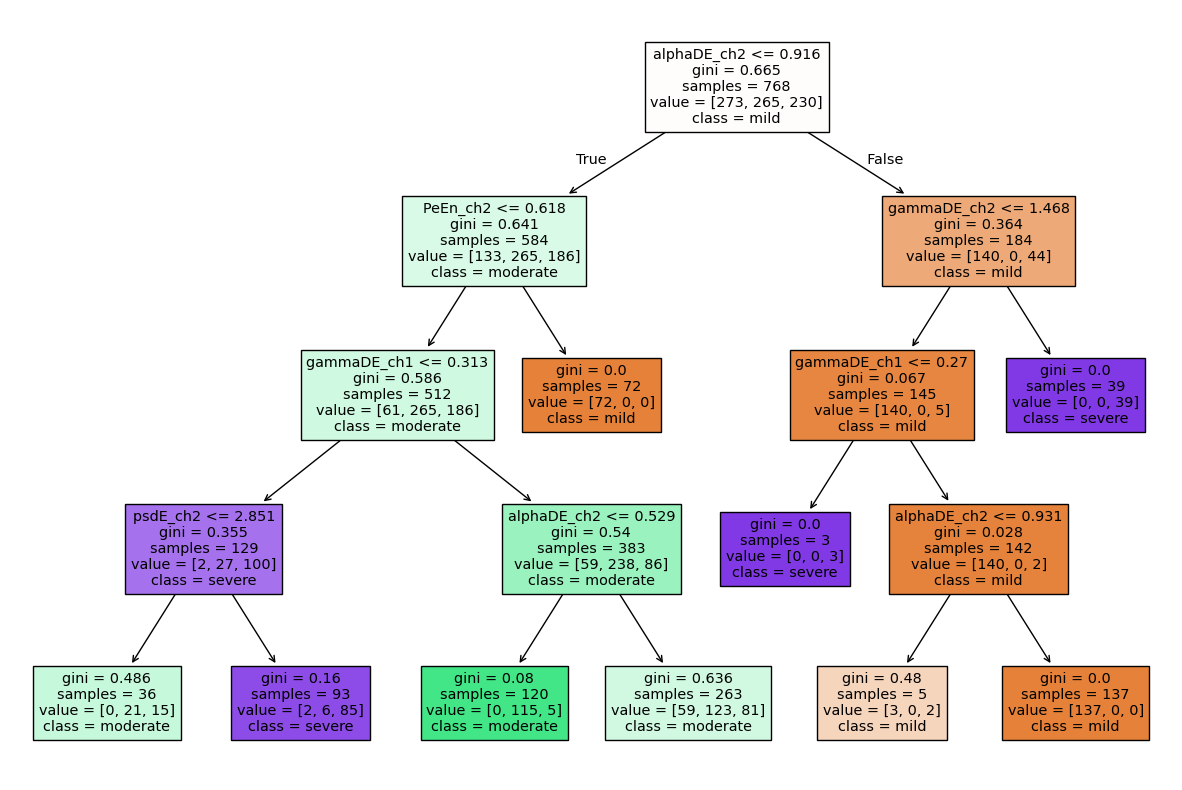

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练决策树模型
decision_tree = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=2, max_depth=4)
decision_tree.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True, feature_names=selectFeature, class_names=["mild", "moderate","severe"])
plt.rcParams['font.size'] = 15  # 设置字体大小
plt.rcParams['text.color'] = 'blue'  # 设置文本颜色
plt.rcParams['axes.labelcolor'] = 'red'  # 设置坐标轴标签颜色

### Compare classifiers

In [29]:
classifiers = {
    'KN': KNeighborsClassifier(n_neighbors=3),
    'SVC': SVC(kernel="sigmoid", C=0.8),
    'SVC': SVC(gamma=2, C=1),
    'DT': DecisionTreeClassifier(max_depth=5),
    'RF': RandomForestClassifier(n_estimators=10, max_depth=5, max_features=1),  # clf.feature_importances_
    'ET': ExtraTreesClassifier(n_estimators=10, max_depth=None),  # clf.feature_importances_
    'AB': AdaBoostClassifier(n_estimators=100),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    'GNB': GaussianNB(),
    'LD': LinearDiscriminantAnalysis(),
    'QD': QuadraticDiscriminantAnalysis()}


for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train,cv=10, scoring='accuracy')
    print(name, '\t--> ', scores.mean())

KN 	-->  0.5833732057416269
SVC 	-->  0.3658749145591251
DT 	-->  0.806032125768968
RF 	-->  0.7969241285030758
ET 	-->  0.9180280246069721
AB 	-->  0.8267942583732057
GB 	-->  0.913961038961039
GNB 	-->  0.5026315789473684
LD 	-->  0.7591421736158579
QD 	-->  0.6549555707450445


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

<Axes: title={'center': 'ExtraTreesClassifier Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

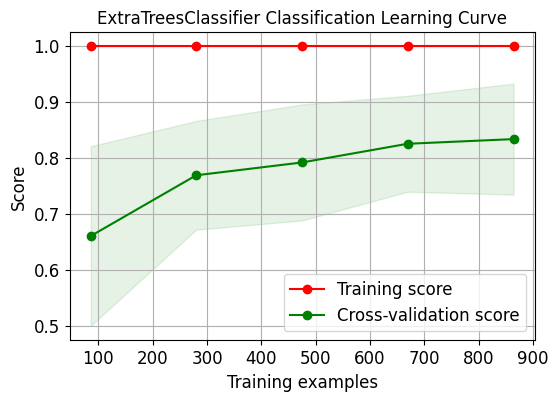

In [35]:
skplt.estimators.plot_learning_curve(ExtraTreesClassifier(n_estimators=10, max_depth=None),
                                     X, y, cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="ExtraTreesClassifier Classification Learning Curve")

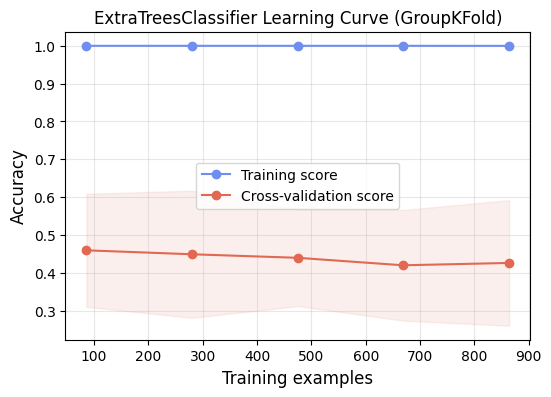

In [54]:
groups = np.array([i for i in range(20) for _ in range(48)]) # 20*48=960
cv = GroupKFold(n_splits=10)  # e.g. 20 subjects → leave-one-subject-out

train_sizes, train_scores, val_scores = learning_curve(
    ExtraTreesClassifier(n_estimators=200, max_depth=15, min_samples_leaf=1),
    X, y, groups=groups,
    cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 5), # 5 points (10%, 32.5%, 55%, 77.5%, 100%)
    scoring="accuracy",
    n_jobs=-1,
    shuffle=True,
    random_state=42
)


# Mean & std
train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
val_mean, val_std = np.mean(val_scores, axis=1), np.std(val_scores, axis=1)

# Plot (skplt style mimic)
plt.figure(figsize=(6,4))

plt.plot(train_sizes, train_mean, "o-", label="Training score", color="#6F8EED")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color="#6F8EED")

plt.plot(train_sizes, val_mean, "o-", label="Cross-validation score", color="#E16852")
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.1, color="#E16852")

plt.title("ExtraTreesClassifier Learning Curve (GroupKFold)", fontsize="large")
plt.xlabel("Training examples", fontsize="large")
plt.ylabel("Accuracy", fontsize="large")
plt.legend(loc="best")
plt.grid(True, alpha=0.3)

plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut
from sklearn.metrics import accuracy_score

# X.shape = (960,78), y.shape = (960,)
subject_ids = np.array([i for i in range(20) for _ in range(48)])

# Outer CV: Leave-One-Subject-Out
logo = LeaveOneGroupOut()

# Define ExtraTrees and parameter grid
clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Placeholder to store outer fold results
outer_scores = []

# Run LOSOCV manually for hyperparameter tuning inside each fold
for train_idx, test_idx in logo.split(X, y, groups=subject_ids):
    X_train_fold, X_test_fold = X[train_idx], X[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]
    groups_train = subject_ids[train_idx]  # for internal CV

    # Internal CV for hyperparameter tuning (subject-wise)
    inner_logo = LeaveOneGroupOut()
    grid = GridSearchCV(clf, param_grid, cv=inner_logo.split(X_train_fold, y_train_fold, groups=groups_train),
                        scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_fold, y_train_fold)

    # Evaluate on outer test set
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_fold)
    acc = accuracy_score(y_test_fold, y_pred)
    outer_scores.append(acc)

print("LOSO CV Accuracy per subject:", outer_scores)
print("Mean LOSO CV Accuracy:", np.mean(outer_scores))

# Optional: plot learning curve using the full dataset and LOSO split
train_sizes = np.linspace(0.1, 1.0, 10)
skplt.estimators.plot_learning_curve(
    grid.best_estimator_,  # best model from last fold
    X, y,
    cv=logo.split(X, y, groups=subject_ids),
    train_sizes=train_sizes,
    scoring='accuracy',
    n_jobs=-1,
    figsize=(6,4),
    title_fontsize="large",
    text_fontsize="large",
    title="ExtraTreesClassifier LOSO Learning Curve"
)
plt.show()

KeyboardInterrupt: 

In [26]:

def subsample_by_subject(X, y, groups, frac, random_state=42):
    rng = np.random.RandomState(random_state)
    unique_subjects = np.unique(groups)
    n_subjects_total = len(unique_subjects)
    n_subjects_keep = max(1, int(np.round(frac * n_subjects_total)))
    chosen_subjects = rng.choice(unique_subjects, size=n_subjects_keep, replace=False)
    mask = np.isin(groups, chosen_subjects)
    return X[mask], y[mask], groups[mask]

# X.shape = (960,78), y.shape = (960,)
groups = np.array([i for i in range(20) for _ in range(48)])
# Take only the first outer fold
outer_cv = GroupKFold(n_splits=len(np.unique(groups)))

for train_idx, test_idx in outer_cv.split(X, y, groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    groups_train, groups_test = groups[train_idx], groups[test_idx]
    break  # stop after first fold

# Inner loop with fractions
for frac in [0.2, 0.4, 0.6, 0.8, 1.0]:
    X_sub, y_sub, groups_sub = subsample_by_subject(X_train, y_train, groups_train, frac)
    n_groups = len(np.unique(groups_sub))
    if n_groups < 2:
        continue

    inner_cv = GroupKFold(n_splits=min(5, n_groups))

    grid = GridSearchCV(
        estimator=ExtraTreesClassifier(),
        param_grid=param_grid,
        cv=inner_cv.split(X_sub, y_sub, groups_sub),
        scoring="accuracy",
        n_jobs=-1
    )

    grid.fit(X_sub, y_sub)
    print(f"Fraction {frac:.1f}: best params={grid.best_params_}, val_acc={grid.best_score_:.3f}")


Fraction 0.2: best params={'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 100}, val_acc=0.500
Fraction 0.4: best params={'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 200}, val_acc=0.469
Fraction 0.6: best params={'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 200}, val_acc=0.442
Fraction 0.8: best params={'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}, val_acc=0.518
Fraction 1.0: best params={'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}, val_acc=0.517


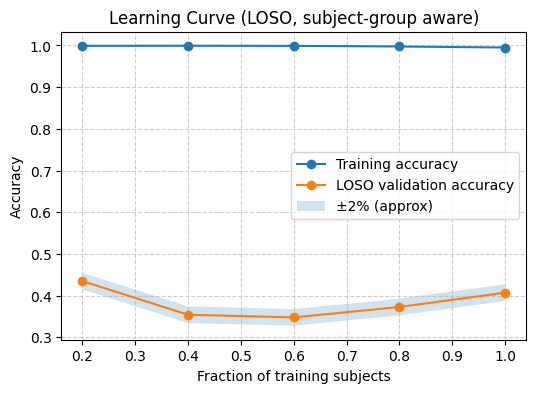

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score

# Example classifier
clf = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Custom learning curve with GroupKFold (LOSO)
def group_learning_curve(estimator, X, y, groups, train_sizes, random_state=42):
    train_scores = []
    val_scores = []

    rng = np.random.RandomState(random_state)
    unique_subjects = np.unique(groups)
    n_subjects = len(unique_subjects)

    cv = GroupKFold(n_splits=n_subjects)  # LOSO CV

    for frac in train_sizes:
        frac_train_scores = []
        frac_val_scores = []

        for train_idx, val_idx in cv.split(X, y, groups):
            # subset of training subjects
            train_subjects = np.unique(groups[train_idx])
            n_keep = max(1, int(frac * len(train_subjects)))
            chosen_subjects = rng.choice(train_subjects, size=n_keep, replace=False)

            mask = np.isin(groups[train_idx], chosen_subjects)
            X_sub, y_sub = X[train_idx][mask], y[train_idx][mask]

            if len(np.unique(y_sub)) < 2:  # need at least 2 classes
                continue

            est = estimator
            est.fit(X_sub, y_sub)

            # train acc
            frac_train_scores.append(accuracy_score(y_sub, est.predict(X_sub)))

            # val acc (on left-out subject)
            frac_val_scores.append(accuracy_score(y[val_idx], est.predict(X[val_idx])))

        train_scores.append(np.mean(frac_train_scores))
        val_scores.append(np.mean(frac_val_scores))

    return train_scores, val_scores


# ---- Run learning curve ----
train_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
train_scores, val_scores = group_learning_curve(clf, X, y, groups, train_sizes)

# ---- Plot like skplt ----
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores, "o-", label="Training accuracy")
plt.plot(train_sizes, val_scores, "o-", label="LOSO validation accuracy")
plt.fill_between(train_sizes,
                 np.array(val_scores) - 0.02,
                 np.array(val_scores) + 0.02,
                 alpha=0.2, label="±2% (approx)")
plt.xlabel("Fraction of training subjects")
plt.ylabel("Accuracy")
plt.title("Learning Curve (LOSO, subject-group aware)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [25]:
# X.shape = (960,78), y.shape = (960,)
subject_ids = np.array([i for i in range(20) for _ in range(48)])

# Outer CV: Leave-One-Subject-Out
logo = LeaveOneGroupOut()

# Inner CV: 5-fold grouped by subject
# def inner_cv_generator(X, y, groups):
#     gkf = GroupKFold(n_splits=5)
#     return gkf.split(X, y, groups=groups)

def inner_cv_generator(X, y, groups):
    n_groups = len(np.unique(groups))
    n_splits = min(3, n_groups)  # adapt if fewer groups
    return GroupKFold(n_splits=n_splits).split(X, y, groups=groups)

# Define ExtraTrees and parameter grid
clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 15, None],
    # 'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5]
}

train_sizes = np.linspace(0.2, 1.0, 5)  # array([0.2, 0.4, 0.6, 0.8, 1. ])
train_scores = []
val_scores = []

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

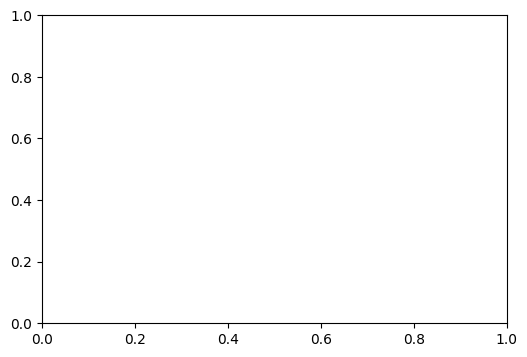

In [30]:
# Loop over training fractions
for frac in train_sizes:
    fold_train_scores = []
    fold_val_scores = []

    # Outer LOSO CV
    for train_idx, test_idx in logo.split(X, y, groups=subject_ids): # 20 iterations
        # Split data
        X_train_fold, X_test_fold = X[train_idx], X[test_idx] # 912, 48
        y_train_fold, y_test_fold = y[train_idx], y[test_idx] # 912, 48
        groups_train = subject_ids[train_idx] # 912

        # Subsample training set (by fraction)
        n_train_sub = int(frac * len(X_train_fold)) # frac*912
        X_train_sub = X_train_fold[:n_train_sub]
        y_train_sub = y_train_fold[:n_train_sub]
        groups_sub = groups_train[:n_train_sub]

        # Inner 5-fold grouped CV for hyperparameter tuning
        clf = ExtraTreesClassifier(random_state=42, n_jobs=-1)
        grid = GridSearchCV(clf, param_grid,
                            cv=inner_cv_generator(X_train_sub, y_train_sub, groups_sub),
                            scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_sub, y_train_sub)

        # Best model performance on training set
        train_acc = accuracy_score(y_train_sub, grid.best_estimator_.predict(X_train_sub))
        fold_train_scores.append(train_acc)

        # Test on the left-out subject
        val_acc = accuracy_score(y_test_fold, grid.best_estimator_.predict(X_test_fold))
        fold_val_scores.append(val_acc)

    # Store average across outer folds
    train_scores.append(np.mean(fold_train_scores))
    val_scores.append(np.mean(fold_val_scores))

# Plot learning curve
plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, val_scores, 'o-', label="LOSO CV score")
plt.xlabel("Training set fraction")
plt.ylabel("Accuracy")
plt.title("Nested LOSO Learning Curve (ExtraTrees)")
plt.legend()
plt.show()

### plot violin diagram

/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:5.234e-48 U_stat=9.308e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:2.596e-06 U_stat=3.783e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:8.684e-13 U_stat=6.444e+04


/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:6.226e-23 U_stat=8.126e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:2.976e-01 U_stat=5.072e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:1.035e-11 U_stat=6.365e+04


/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:8.236e-39 U_stat=8.924e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:1.325e-02 U_stat=5.394e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:5.812e-19 U_stat=6.836e+04


/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:2.229e-02 U_stat=6.220e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:4.999e-01 U_stat=4.687e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:6.080e-01 U_stat=4.954e+04


/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:6.301e-53 U_stat=9.498e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:1.251e-16 U_stat=2.980e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:2.117e-10 U_stat=6.265e+04


/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:6.805e-18 U_stat=7.813e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:1.145e-02 U_stat=4.271e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:2.208e-06 U_stat=5.901e+04


/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:3.925e-26 U_stat=8.306e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:4.239e-02 U_stat=5.294e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:2.943e-17 U_stat=6.735e+04


/tmp/ipython-input-1911626597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

mild vs. moderate: Mann-Whitney-Wilcoxon test two-sided, P_val:5.936e-02 U_stat=5.170e+04
moderate vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:3.873e-02 U_stat=5.302e+04
mild vs. severe: Mann-Whitney-Wilcoxon test two-sided, P_val:1.764e-02 U_stat=4.306e+04


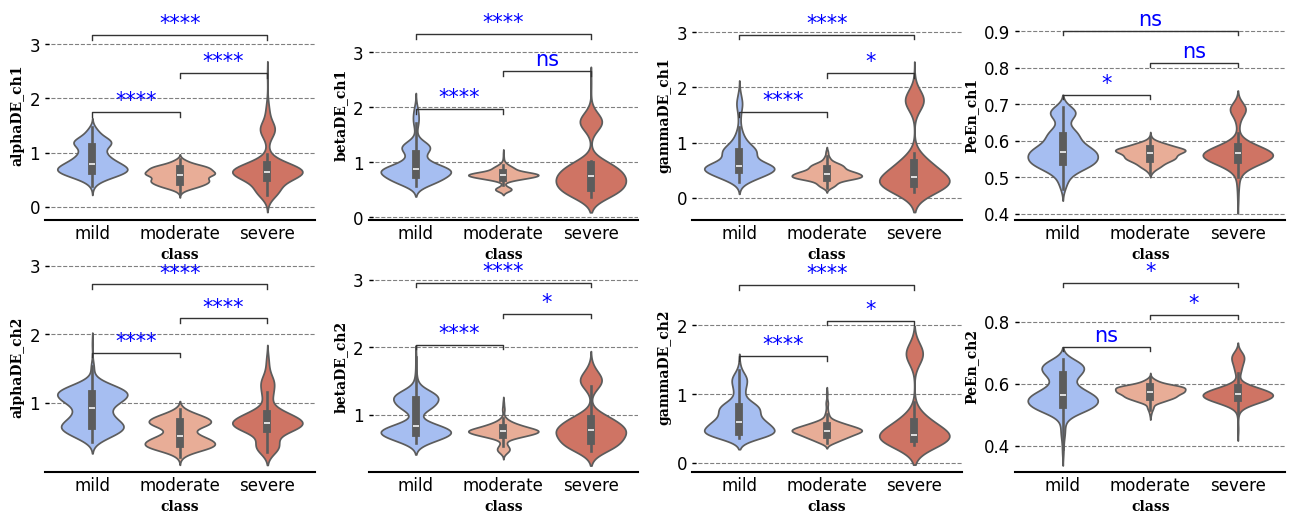

In [ ]:
forviolin_tick=['alphaDE_ch1','betaDE_ch1','gammaDE_ch1','PeEn_ch1','alphaDE_ch2','betaDE_ch2','gammaDE_ch2','PeEn_ch2']

def forviolin(ax,df,feature):
    ax = sns.violinplot(x=df["class"], y=df[feature],palette=['#99BAFE','#F6A789','#E16852'],ax=ax)
    pairs = [("mild", "moderate"), ("moderate", "severe"), ("mild", "severe")]
    annotator = Annotator(ax, pairs, x=df["class"], y=df[feature], )
    annotator.configure(test='Mann-Whitney', text_format='star', line_height=0.03, line_width=1)
    annotator.apply_and_annotate()

    ax.tick_params(which='major', direction='in', length=3, width=1., labelsize=12, bottom=False)
    for spine in ["top", "left", "right"]:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.grid(axis='y', ls='--', c='gray')
    ax.set_axisbelow(True)
    font = {'family':'serif', 'weight':'bold' ,'color':'black', 'size':10}
    ax.set_xlabel('class', fontdict = font)
    ax.set_ylabel(feature, fontdict = font)
    return ax

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 6), dpi=100, facecolor="w")
for j in range(0, 2):
    for i in range(0, 4):
        forviolin(ax[j, i], df_allfeature, forviolin_tick[4*j+i])